# DS 3000 HW 5 $\color{red}{\text{SOLUTIONS}}$

Due: Tueday Oct 25 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope ([1:35 Section](https://www.gradescope.com/courses/431947) [3:25 Section](https://www.gradescope.com/courses/431864)) (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of Piazza ([1:35 Section](https://piazza.com/class/l7dkfe3cgz21ul) [3:25 Section](https://piazza.com/class/l7dkey4g6m71e5)) (also accessable through Canvas)
- Make use of [Office Hours](https://docs.google.com/spreadsheets/d/1SMacPh9lhRvjHI1VCJfBbNGSga3RTYKzSsfRWEWqWQI/edit?usp=sharing)
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
    - Remember that documentation/style is important (See the Style Guide on Canvas!)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

# Get to Know You

This HW deals with the Get to Know You results from both of my DS3000 sections this semester. Please download the `unclean_gtky.csv` file for use on this homework. **NOTE: this is not the same `cleaner_gtky.csv` that we used in class, it is a new, less clean version!**.

## Pseudonymizing data

It's often the case that we 'Pseudonymize' (use random fake pseudonyms instead of personally identifiable information) a dataset by storing a code which maps some sensitive information to a consistent tag.

| Timestamp      | Fake Student ID | What year/class are you in? | Have you done a co-op during your time at Northeastern? | How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language) | Which language(s) have you had at least some experience programming in? (Choose all that apply) | What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20\*12 + 2) = 242 months old. | What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!) |
| -------------- | --------------- | --------------------------- | ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| 09-09-22 15:37 | 7289            | Sophomore                   | No                                                      | 9                                                                                                                                             | Python, Other(s)                                                                                | 234                                                                                                                           | 60                                                                                |
| 09-09-22 16:01 | 36              | Sophomore                   | No                                                      | 7                                                                                                                                             | Python                                                                                          | 233                                                                                                                           | 100                                                                               |
| 09-09-22 14:19 | 2676            | Junior                      | Yes                                                     | 7                                                                                                                                             | Python, Java, C/C++                                                                             | 252                                                                                                                           | 70                                                                                |
| 09-09-22 16:07 | 3848            | Junior                      | No                                                      | 7                                                                                                                                             | Python, Java                                                                                    | 243                                                                                                                           | 50                                                                                |
| 09-09-22 16:06 | 2755            | Sophomore                   | No                                                      | 5                                                                                                                                             | Python, R                                                                                       | 231                                                                                                                           | 90                                                                                |
| 09-09-22 15:27 | 3724            | Junior                      | No                                                      | 8                                                                                                                                             | Python, Java                                                                                    | 245                                                                                                                           | 70                                                                                |
| 09-09-22 14:16 | 9619            | Senior                      | Yes                                                     | 7                                                                                                                                             | Python                                                                                          | 258                                                                                                                           | 90                                                                                |
| 09-09-22 16:06 | 9935            | Fifth year                  | Yes                                                     | 3                                                                                                                                             | Java, Other(s)                                                                                  | 264                                                                                                                           |                                                                                   |

To protect student privacy, this data has already been pseudonymized by creating a `Fake Student ID` column with random numbers.

Note that there is a difference between:
- **pseudonymization** (changing everyone's name to a pseudonym)
- **anonymization**  (ensuring no individual can be uniquely identified within the data)

Briefly, if a single student was known to be the only one who submitted their Get to Know You at 15:37, then changing their name to a pseudonym is insufficient to protect their privacy within this data.  [This link](https://gathercapture.com/latest/anonymous-pseudonymous-data-are-they-important) contains further details, though its not necessary for this HW.

### Generating a pseudonym

[Universally Unique Identifiers](https://en.wikipedia.org/wiki/Universally_unique_identifier) is a CS term for a unique name:

In [1]:
from uuid import uuid4

# a good random pseudonym/alias
str(uuid4())

'3efb3dd4-1043-4097-9291-f63162405e60'

In [2]:
# a good enough random alias for us (doesn't need to be as long to be unique)
str(uuid4())[:6]

'43476b'

You can read more about the process in the [python docs for uuid4()](https://docs.python.org/3/library/uuid.html#uuid.uuid4) but its sufficient to know that there are so many unique output strings of `uuid4()` that we can assume no two calls return the same id.

## Part 1: 20 points

Pseudonymize `df_gtky` (again; since I already did it once) by completing the tasks below:

1. Load `unclean_gtky.csv` to a DataFrame
1. Write a `pseudonymize_col()` function which:
    * accepts a DataFrame and the name of one of its columns
    * returns `pseudo_map_dict`
        - keys are the unique items observed in original column of dataframe
        - values are the new pseudonyms
    * operates `inplace` by modifying the input DataFrame to replacing each item in the given column with its corresponding pseudonym
    
Note that the pseudonymization must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym.

1. call `pseudonymize_col()` and save the resulting `df_gtky` as `cleaner_gtky_anon.csv`

[This example](https://colab.research.google.com/drive/1VdikAnXZEBx3tGxclDG-BC-psr_D_DBN?usp=sharing) may help clarify the expected behavior of `pseudonymize_col()`.

Notice that we save `pseudo_map_dict` to ensure the pseudonymiazation can be undone.  What if some medical study uncovers a health problem with a participant and must contact them?  A study should be able to "undo" the pseudonymization to recover the original participants identity.

$\color{red}{\text{Solution:}}$

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd 

df_gtky = pd.read_csv('unclean_gtky.csv')
df_gtky.head()

,Timestamp,Fake Student ID,What year/class are you in?,Have you done a co-op during your time at Northeastern?,"How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language)",Which language(s) have you had at least some experience programming in? (Choose all that apply),"What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20*12 + 2) = 242 months old.",What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!)
0,09-09-22 15:37,7289,Sophomore,No,9,"Python, Other(s)",234.0,60.0
1,09-09-22 16:01,36,Sophomore,No,7,Python,233.0,100.0
2,09-09-22 14:19,2676,Junior,Yes,7,"Python, Java, C/C++",252.0,70.0
3,09-09-22 16:07,3848,Junior,No,7,"Python, Java",243.0,50.0
4,09-09-22 16:06,2755,Sophomore,No,5,"Python, R",231.0,90.0


In [4]:
def pseudonymize_col(df, column_name):
    """ pseudonymizes values of given column 

    Args:
        df (pd.Dataframe): the dataframe to manipulate
        column_name (str): the column name of the column to pseudonymize

    Returns:
        pseudo_map_dict (dict()): dictionary of old value 
            and new pseudonymized value pairs
    """
    pseudo_map_dict = dict()
    
    # loop through all unique values in given column 
    for val in df[column_name].unique():
        # generate pseudonymize value
        new_val = str(uuid4())[:6]
        
        # save old value as key and new value at value in dict
        pseudo_map_dict[val] = new_val
        
        # replace all instances of old value with new pseudonymized value
        df[column_name].replace(val, new_val, inplace = True)
        
    return pseudo_map_dict

In [5]:
# create new CSV with fake_student_id column pseudonymized
pseudonymize_col(df_gtky, 'Fake Student ID')
df_gtky.to_csv('cleaner_gtky_anon.csv')

In [6]:
df_gtky.head()

,Timestamp,Fake Student ID,What year/class are you in?,Have you done a co-op during your time at Northeastern?,"How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language)",Which language(s) have you had at least some experience programming in? (Choose all that apply),"What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20*12 + 2) = 242 months old.",What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!)
0,09-09-22 15:37,2313fb,Sophomore,No,9,"Python, Other(s)",234.0,60.0
1,09-09-22 16:01,7dda5a,Sophomore,No,7,Python,233.0,100.0
2,09-09-22 14:19,d42d5f,Junior,Yes,7,"Python, Java, C/C++",252.0,70.0
3,09-09-22 16:07,03bc1d,Junior,No,7,"Python, Java",243.0,50.0
4,09-09-22 16:06,dfa185,Sophomore,No,5,"Python, R",231.0,90.0


## Part 2: Data cleaning

The dataframe, so far, looks something like (note your `Fake Student ID` column will look different because of randomness):

| Timestamp      | Fake Student ID | What year/class are you in? | Have you done a co-op during your time at Northeastern? | How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language) | Which language(s) have you had at least some experience programming in? (Choose all that apply) | What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20\*12 + 2) = 242 months old. | What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!) |
| -------------- | --------------- | --------------------------- | ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| 09-09-22 15:37 | b35601          | Sophomore                   | No                                                      | 9                                                                                                                                             | Python, Other(s)                                                                                | 234                                                                                                                           | 60                                                                                |
| 09-09-22 16:01 | ea9cad          | Sophomore                   | No                                                      | 7                                                                                                                                             | Python                                                                                          | 233                                                                                                                           | 100                                                                               |
| 09-09-22 14:19 | 98924b          | Junior                      | Yes                                                     | 7                                                                                                                                             | Python, Java, C/C++                                                                             | 252                                                                                                                           | 70                                                                                |
| 09-09-22 16:07 | b3a188          | Junior                      | No                                                      | 7                                                                                                                                             | Python, Java                                                                                    | 243                                                                                                                           | 50                                                                                |
| 09-09-22 16:06 | e723a1          | Sophomore                   | No                                                      | 5                                                                                                                                             | Python, R                                                                                       | 231                                                                                                                           | 90                                                                                |

There are a few data cleaning steps we need to take in order to make it more readable and easier to use. When we are done, we should have a clean data set which looks like this:

|   | student\_id | class     | co-op | prog\_exp | age | start\_sal | datetimestamp  | python | java  | r     | c/c++ | other(s) |
| - | ----------- | --------- | ----- | --------- | --- | ---------- | -------------- | ------ | ----- | ----- | ----- | -------- |
| 0 | 9bef30      | Sophomore | FALSE | 9         | 234 | 60         | 09-09-22 15:37 | TRUE   | FALSE | FALSE | FALSE | TRUE     |
| 1 | 03447c      | Sophomore | FALSE | 7         | 233 | 100        | 09-09-22 16:01 | TRUE   | FALSE | FALSE | FALSE | FALSE    |
| 2 | 8fe0cf      | Junior    | TRUE  | 7         | 252 | 70         | 09-09-22 14:19 | TRUE   | TRUE  | FALSE | TRUE  | FALSE    |
| 3 | 5d8693      | Junior    | FALSE | 7         | 243 | 50         | 09-09-22 16:07 | TRUE   | TRUE  | FALSE | FALSE | FALSE    |
| 4 | 5e28fe      | Sophomore | FALSE | 5         | 231 | 90         | 09-09-22 16:06 | TRUE   | FALSE | TRUE  | FALSE | FALSE    |

### Part 2.1 (8 points)

Rename the columns so that they are:
- timestamp
- student_id
- class
- co-op
- prog_exp
- lang_exp
- age
- start_sal

$\color{red}{\text{Solution:}}$

In [7]:
# we can pass a dict whose keys are old names and values are new names
dict_rename = {'Timestamp': 'timestamp',
               'Fake Student ID': 'student_id',
               'What year/class are you in?': 'class',
               'Have you done a co-op during your time at Northeastern?': 'co-op',
               'How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language)': 'prog_exp',
               'Which language(s) have you had at least some experience programming in? (Choose all that apply)': 'lang_exp',
               'What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20*12 + 2) = 242 months old.': 'age',
               'What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!)': 'start_sal'}
df_gtky = df_gtky.rename(dict_rename, axis=1)
df_gtky.head()

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal
0,09-09-22 15:37,2313fb,Sophomore,No,9,"Python, Other(s)",234.0,60.0
1,09-09-22 16:01,7dda5a,Sophomore,No,7,Python,233.0,100.0
2,09-09-22 14:19,d42d5f,Junior,Yes,7,"Python, Java, C/C++",252.0,70.0
3,09-09-22 16:07,03bc1d,Junior,No,7,"Python, Java",243.0,50.0
4,09-09-22 16:06,dfa185,Sophomore,No,5,"Python, R",231.0,90.0


### Part 2.2.1 (5 points)

The `co-op` column contains strings 'Yes' and 'No'.  `.replace()` these entries with boolens ('Yes'-> `True`, 'No' -> `False`).

$\color{red}{\text{Solution:}}$

In [8]:
# replace string values yes and no with boolean True and False respectively
df_gtky['co-op'].replace(['Yes', 'No'], [True, False], inplace = True)
df_gtky.head()

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal
0,09-09-22 15:37,2313fb,Sophomore,False,9,"Python, Other(s)",234.0,60.0
1,09-09-22 16:01,7dda5a,Sophomore,False,7,Python,233.0,100.0
2,09-09-22 14:19,d42d5f,Junior,True,7,"Python, Java, C/C++",252.0,70.0
3,09-09-22 16:07,03bc1d,Junior,False,7,"Python, Java",243.0,50.0
4,09-09-22 16:06,dfa185,Sophomore,False,5,"Python, R",231.0,90.0


### Part 2.2.2 (5 points)

The `start_sal` column contains missing values. Let's assume that those who forgot to put in an ideal starting salary would like to at least make enough to live as a single adult in Massachussetts (\$45517 according to [this website](https://livingwage.mit.edu/states/25)). Replace all missing values in the `start_sal` column with `45.517`. Check `df_gtky.tail()` to check (as the last observation has a missing `start_sal` value).

In [9]:
dict_fill = {'start_sal': 45.517}
df_gtky.fillna(dict_fill, inplace = True)
df_gtky.tail()

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal
97,09-12-22 16:02,6df486,Sophomore,False,5,Python,228.0,70.000
98,9/15/2022 10:36:54,7631b0,Sophomore,False,10,"Java, Other(s)",19.0,100.000
99,9/15/2022 14:12:59,1b7015,Sophomore,False,9,Java,236.0,70.000
100,9/16/2022 13:32:34,e46799,Sophomore,False,3,"Python, Java",236.0,100.000
101,9/16/2022 13:38:59,54b72b,Sophomore,False,7,Java,228.0,45.517


### Part 2.3 (15 points)
`.map()` the `timestamp` column (containing strings) to a new `datetimestamp` column which contains `datetime` objects corresponding to the date and time given in `timestamp`.
- for example, the string `'09-09-22 15:37'` should be mapped to `datetime(year=2022, month=9, day=9, hour=15, minute=37)`
    - **be careful**: take a look at the `df_gtky.tail()` and notice that some of the `timestamp` strings are formatted differently. Make sure these are converted into the same type of datetime objects as the rest (i.e. remove the seconds from the ones that have them).
- use `DataFrame.map()` with a `convert_date()` function you implement and document

Be sure that your `convert_date()` function:
- is properly documented
    - docstring
    - comments
    - code "chunking" with whitespace
- is tested with two `assert` statements you write
    - you need two because there are two different formats for the date!
    

$\color{red}{\text{Solution:}}$

In [10]:
# see the difference?
df_gtky.tail()

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal
97,09-12-22 16:02,6df486,Sophomore,False,5,Python,228.0,70.000
98,9/15/2022 10:36:54,7631b0,Sophomore,False,10,"Java, Other(s)",19.0,100.000
99,9/15/2022 14:12:59,1b7015,Sophomore,False,9,Java,236.0,70.000
100,9/16/2022 13:32:34,e46799,Sophomore,False,3,"Python, Java",236.0,100.000
101,9/16/2022 13:38:59,54b72b,Sophomore,False,7,Java,228.0,45.517


In [11]:
from datetime import datetime, timedelta

def convert_date(date_str): 
    """ Exract the date and time from string 
    
    Args:
        date_str (str): the string to extract the 
            date and time from

    Returns:
        true_datetime (datetime.date): the date and time
    """
    
    # check the format with conditional statement
    if '-' in date_str:
        format_str = '%m-%d-%y %H:%M'
    else:
        format_str = '%m/%d/%Y %H:%M:%S'
    
    # convert from string to datetime date
    get_datetime = datetime.strptime(date_str, format_str)
    true_datetime = get_datetime - timedelta(seconds = get_datetime.second)
    
    return true_datetime

In [12]:
assert convert_date('09-09-22 15:37') == datetime(year=2022, month=9, day=9, hour=15, minute=37)

In [13]:
assert convert_date('09/15/2022 10:36:54') == datetime(year=2022, month=9, day=15, hour=10, minute=36)

In [14]:
# make new datetimestamp column
df_gtky['datetimestamp'] = df_gtky['timestamp'].map(convert_date)

df_gtky

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal,datetimestamp
0,09-09-22 15:37,2313fb,Sophomore,False,9,"Python, Other(s)",234.0,60.000,2022-09-09 15:37:00
1,09-09-22 16:01,7dda5a,Sophomore,False,7,Python,233.0,100.000,2022-09-09 16:01:00
2,09-09-22 14:19,d42d5f,Junior,True,7,"Python, Java, C/C++",252.0,70.000,2022-09-09 14:19:00
3,09-09-22 16:07,03bc1d,Junior,False,7,"Python, Java",243.0,50.000,2022-09-09 16:07:00
4,09-09-22 16:06,dfa185,Sophomore,False,5,"Python, R",231.0,90.000,2022-09-09 16:06:00
...,...,...,...,...,...,...,...,...,...
97,09-12-22 16:02,6df486,Sophomore,False,5,Python,228.0,70.000,2022-09-12 16:02:00
98,9/15/2022 10:36:54,7631b0,Sophomore,False,10,"Java, Other(s)",19.0,100.000,2022-09-15 10:36:00
99,9/15/2022 14:12:59,1b7015,Sophomore,False,9,Java,236.0,70.000,2022-09-15 14:12:00
100,9/16/2022 13:32:34,e46799,Sophomore,False,3,"Python, Java",236.0,100.000,2022-09-16 13:32:00


### Part 2.4 (20 points)

The data encoding in columns `lang_exp` is not convenient. We would like the column:

| lang_exp            |
|---------------------|
| Python, Other(s)    |
| Python              |
| Python, Java, C/C++ |
| Python, Java        |
| Python, R           |

To be turned into five columns (`python`, `java`, `r`, `c/c++`, `other(s)`) that are all boolean values of `True` or `False` depending on if a student has any experience in that programming language:

| python | java  | r     | c/c++ | other(s) |
|--------|-------|-------|-------|----------|
| True   | False | False | False | True     |
| True   | False | False | False | False    |
| True   | True  | False | True  | False    |
| True   | True  | False | False | False    |
| True   | False | True  | False | False    |

Write two functions:
- `clean_lang()`: which takes a single observation (string) and outputs a series with keys equal to the column names of your desired new columns, and appropriate boolean values. 
- `get_lang_df()`: which uses `.map` to create the new columns and add them to the data frame. 

For both of the functions you create:
- be sure it is properly documented:
    - docstring
    - commenets
    - code "chunking" with whitespace
- (for at least `clean_lang()`) be sure it is properly tested
    - `assert` a few strings as in the rows above to ensure the function(s) work
    
**Hint:** We did something not too dissimilar on HW 4, but note that you may want to begin by capitalizing certain letters of the keys in your dictionary; you can convert them to lowercase at the end of your `get_lang_df()` function.

$\color{red}{\text{Solution:}}$

In [15]:
def clean_lang(str_lang):
    """ convert language lists to boolean columns
    
    Args:
        str_lang (str): the string of programming languages

    Returns:
        bool_lang_dict (bool): the boolean dictionary corresponding to the string
    
    """
    
    # dictionary of the codes and their corresponding boolean
    bool_lang_dict = {'Python': [],
                      'Java': [],
                      'R': [],
                      'C/C++': [],
                      'Other(s)': []}
    
    split_str = str_lang.split(', ')
    for key in bool_lang_dict.keys():
        if key in split_str:
            bool_lang_dict[key].append(True)
        else:
            bool_lang_dict[key].append(False)
    
    return bool_lang_dict

In [16]:
clean_lang('Python, Java')

{'Python': [True],
 'Java': [True],
 'R': [False],
 'C/C++': [False],
 'Other(s)': [False]}

In [17]:
def get_lang_df(lang_series):
    """ takes the lang_exp column (Series) and outputs the new columns
    
    Args:
        lang_series (Series): the series from the data frame
        
    Returns:
        lang_df (DataFrame): a data frame with five columns
    
    """
    
    all_series = lang_series.map(clean_lang)
    lang_df = pd.DataFrame.from_dict(all_series[0])
    for idx in range(1, len(all_series)):
        lang_df = lang_df.append(pd.DataFrame.from_dict(all_series[idx]), ignore_index = True)
        
    # create a function to make the column names lower case
    def make_lower(x):
        return str(x).lower()

    lang_df.rename(make_lower, axis=1, inplace = True)    
    
    return lang_df

In [18]:
assert clean_lang('Python, Java') == {'Python': [True], 'Java': [True], 'R': [False], 'C/C++': [False], 'Other(s)': [False]}

### Part 2.5 (10 points)

Finally, 
- delete the two columns which are redundant with our cleaner format: 'timestamp' and 'lang_exp'
    - You can delete a DataFrame column (inplace) with:
``` python
   del data_frame[col]
```
- add the five new columns
    - You can add two DataFrame objects together using `pd.concat`:
```python
    new_df = pd.concat([old_df, new_cols], axis = 1)
```

Then, save this final cleaned data frame as `final_gtky.csv` **and attach it with your Gradescop submission**.

$\color{red}{\text{Solution:}}$

In [19]:
# get data frame with five new columns to replace lang_exp
new_lang = get_lang_df(df_gtky['lang_exp'])

# drop timestamp and lang_exp
del df_gtky['timestamp']
del df_gtky['lang_exp']

# attach new_lang
df_gtky = pd.concat([df_gtky, new_lang], axis = 1)
df_gtky.head()

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s)
0,2313fb,Sophomore,False,9,234.0,60.0,2022-09-09 15:37:00,True,False,False,False,True
1,7dda5a,Sophomore,False,7,233.0,100.0,2022-09-09 16:01:00,True,False,False,False,False
2,d42d5f,Junior,True,7,252.0,70.0,2022-09-09 14:19:00,True,True,False,True,False
3,03bc1d,Junior,False,7,243.0,50.0,2022-09-09 16:07:00,True,True,False,False,False
4,dfa185,Sophomore,False,5,231.0,90.0,2022-09-09 16:06:00,True,False,True,False,False


In [20]:
df_gtky.to_csv('final_gtky.csv')

# Part 3: Summarize and Visualize Data

With our new clean data set, let us ask some questions that we may be able to answer with some basic data summaries or plots.

In [21]:
df_gtky.head()

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s)
0,2313fb,Sophomore,False,9,234.0,60.0,2022-09-09 15:37:00,True,False,False,False,True
1,7dda5a,Sophomore,False,7,233.0,100.0,2022-09-09 16:01:00,True,False,False,False,False
2,d42d5f,Junior,True,7,252.0,70.0,2022-09-09 14:19:00,True,True,False,True,False
3,03bc1d,Junior,False,7,243.0,50.0,2022-09-09 16:07:00,True,True,False,False,False
4,dfa185,Sophomore,False,5,231.0,90.0,2022-09-09 16:06:00,True,False,True,False,False


### Part 3.1 (12 points)

Calculate and compare for `'co-op' = True` vs. `'co-op' = False`:
    - the mean, median, and variance of `prog_exp`
    - the mean, median, and variance of `age`
Calculate and compare for `'python' = True` vs. `'python' = False`:
    - the mean, median, and variance of `prog_exp`
    - the mean, median, and variance of `age`

Note that this means you are going to be calculating **eight** means, medians and variances. Keep track of which numbers represent which statistics. Then **in a markdown cell** provide *at least* 3-4 sentences discussing what conclusions you may be able to draw from these statistics.

$\color{red}{\text{Solution:}}$

In [26]:
print(df_gtky.loc[df_gtky['co-op'] == True,'prog_exp'].mean())
print(df_gtky.loc[df_gtky['co-op'] == False,'prog_exp'].mean())
print(df_gtky.loc[df_gtky['python'] == True,'prog_exp'].mean())
print(df_gtky.loc[df_gtky['python'] == False,'prog_exp'].mean())

print(df_gtky.loc[df_gtky['co-op'] == True,'prog_exp'].median())
print(df_gtky.loc[df_gtky['co-op'] == False,'prog_exp'].median())
print(df_gtky.loc[df_gtky['python'] == True,'prog_exp'].median())
print(df_gtky.loc[df_gtky['python'] == False,'prog_exp'].median())

print(df_gtky.loc[df_gtky['co-op'] == True,'prog_exp'].var())
print(df_gtky.loc[df_gtky['co-op'] == False,'prog_exp'].var())
print(df_gtky.loc[df_gtky['python'] == True,'prog_exp'].var())
print(df_gtky.loc[df_gtky['python'] == False,'prog_exp'].var())


7.404761904761905
7.716666666666667
7.827160493827161
6.666666666666667
8.0
8.0
8.0
7.0
5.563879210220674
2.8844632768361578
3.719753086419753
4.033333333333333


In [34]:
print(df_gtky.loc[df_gtky['co-op'] == True,'age'].mean())
print(df_gtky.loc[df_gtky['co-op'] == False,'age'].mean())
print(df_gtky.loc[df_gtky['python'] == True,'age'].mean())
print(df_gtky.loc[df_gtky['python'] == False,'age'].mean())

print(df_gtky.loc[df_gtky['co-op'] == True,'age'].median())
print(df_gtky.loc[df_gtky['co-op'] == False,'age'].median())
print(df_gtky.loc[df_gtky['python'] == True,'age'].median())
print(df_gtky.loc[df_gtky['python'] == False,'age'].median())

print(df_gtky.loc[df_gtky['co-op'] == True,'age'].var())
print(df_gtky.loc[df_gtky['co-op'] == False,'age'].var())
print(df_gtky.loc[df_gtky['python'] == True,'age'].var())
print(df_gtky.loc[df_gtky['python'] == False,'age'].var())

257.23125
236.88333333333333
247.215625
236.25
257.0
233.0
242.5
232.0
114.28008814102566
390.0709039548023
421.06763251582294
116.82894736842105


Some takeaways: Those who said they had Python experience on average said they had a higher overall programming experience (7.83 vs. 6.67), but those who said they went on Co-op on average said they had a lower overall programming experience than those who did not (7.41 vs. 7.72). The former makes sense, the latter does not, though the latter numbers are close.

The medians are all about the same (7 or 8), with the lowest belonging to those students who said they had no Python experience.

There is much more variability in programming experience for those who went on Co-op than those who did not (5.56 vs. 2.88), while the variability between those who did/did not have Python experience is about the same (3.72 vs. 4.03). The former is perhaps surprising; maybe some students went on Co-ops that did not have a programming component, which may have hurt their opinion of their experience, while others went on programming heavy Co-ops (this might explain the wide range of values).

### Part 3.2 (5 points)

Use matplotlib (**not plotly**) to create a scatter plot of `age` versus `prog_exp`, and color the points based on whether a student had any experience in Python. Make sure you use `sns.set()` to help the aesthetics of your plot. Do not forget labels, title, legend, and to set alpha. Under the plot, **in a markdown cell** discuss in 2-3 sentences your major takeaways from the plot.

**Note:** there should definitely be something off about the plot after you make it. Discuss what the issue is, and what you would need to do to fix it.

$\color{red}{\text{Solution:}}$

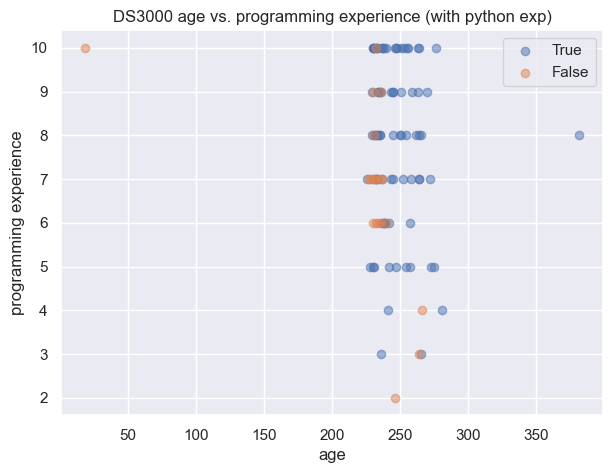

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(7,5))

# get python = True and python = False data
python_true = df_gtky.loc[df_gtky['python'] == True,:]
python_false = df_gtky.loc[df_gtky['python'] == False,:]

# plots 
plt.scatter(python_true['age'], python_true['prog_exp'], alpha=.5, label = True)
plt.scatter(python_false['age'], python_false['prog_exp'], alpha=.5, label = False)

# styling
plt.xlabel('age')
plt.ylabel('programming experience')
plt.title('DS3000 age vs. programming experience (with python exp)')
plt.legend();

Takeaways: Generally older students are more likely to have Python experience than younger students. The older students that do not have Python experience also have low programming experience. There is very clearly still a messy data point; someone who entered their age in months as 19 (in years). In order to fix this, we would need to identify the student and replace their value for age.

## Extra Credit (+5 points)

Fix the issue with the data set that you identified based on the plot in Part 3.2, then save the resulting data frame as `really_final_gtky.csv` and **attach it with your Gradescope submission**. To help you in identifying where the issue is, you may want to use the `.where()` function from `numpy` ([documentation here](https://numpy.org/doc/stable/reference/generated/numpy.where.html)).

In [28]:
import numpy as np

# identify the messy data point
df_gtky.iloc[np.where(df_gtky['age'] < 50)]
# replace 19 with 19*12 in column 'age'
df_gtky.replace({'age': 19}, value={'age': 19*12}, inplace = True)

In [29]:
df_gtky.tail()

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s)
97,6df486,Sophomore,False,5,228.000,70.000,2022-09-12 16:02:00,True,False,False,False,False
98,7631b0,Sophomore,False,10,228.000,100.000,2022-09-15 10:36:00,False,True,False,False,True
99,1b7015,Sophomore,False,9,236.000,70.000,2022-09-15 14:12:00,False,True,False,False,False
100,e46799,Sophomore,False,3,236.000,100.000,2022-09-16 13:32:00,True,True,False,False,False
101,54b72b,Sophomore,False,7,228.000,45.517,2022-09-16 13:38:00,False,True,False,False,False


In [30]:
df_gtky.to_csv('really_final.gtky.csv')